In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv', index_col='id', parse_dates = ['pickup_datetime'])
test = pd.read_csv('test.csv', index_col='id', parse_dates = ['pickup_datetime'])
import seaborn as sns

In [2]:
from catboost import CatBoostRegressor

In [3]:
columns = ["vendor_id", "passenger_count", "store_and_fwd_flag"]

In [4]:
df["dist"] = np.arccos(np.clip(np.sin(df['pickup_latitude']) * np.sin(df['dropoff_latitude'])+ np.cos(df['pickup_latitude'])
               * np.cos(df['dropoff_latitude'])
                   * np.cos(df['pickup_longitude'] - df['dropoff_longitude']), a_min = 0, a_max = 0.9999999)) * 6371000

In [5]:
df = df.fillna(0)

In [6]:
df["passenger_count"].value_counts()

1    775226
2    158025
5     58449
3     44892
6     36122
4     21219
0        46
7         2
9         1
8         1
Name: passenger_count, dtype: int64

In [7]:
df

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
id,,,,,,,,,,
id0521922,1,2016-05-12 01:43:20,1,-73.994102,40.744423,-73.989967,40.726486,N,438,117239.481975
id3885136,1,2016-04-25 09:48:28,1,-73.990944,40.766834,-74.003258,40.738605,N,1050,196089.462093
id0463847,2,2016-05-31 08:41:40,1,-73.870552,40.773609,-73.980827,40.759129,N,2769,706663.279190
id3573732,2,2016-03-09 11:37:51,1,-73.958435,40.781597,-73.963631,40.808296,N,732,173283.761416
id3524847,1,2016-01-17 21:45:45,3,-73.776627,40.645306,-73.700447,40.620991,N,1442,499531.526201
...,...,...,...,...,...,...,...,...,...,...
id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,1281,370465.022864
id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,833,110573.219524
id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,1285,484420.110066


In [8]:
df = df.drop("pickup_longitude", axis = 1)
df = df.drop("pickup_latitude", axis = 1)
df = df.drop("dropoff_longitude", axis = 1)
df = df.drop("dropoff_latitude", axis = 1)

In [9]:
df.head() 

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,dist
id,,,,,,
id0521922,1,2016-05-12 01:43:20,1,N,438,117239.481975
id3885136,1,2016-04-25 09:48:28,1,N,1050,196089.462093
id0463847,2,2016-05-31 08:41:40,1,N,2769,706663.279190
id3573732,2,2016-03-09 11:37:51,1,N,732,173283.761416
id3524847,1,2016-01-17 21:45:45,3,N,1442,499531.526201


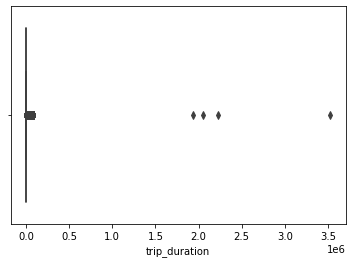

In [10]:
ax = sns.boxplot(x = df["trip_duration"])

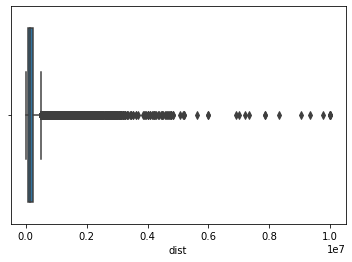

In [11]:
ax = sns.boxplot(x = df["dist"])

In [12]:
df = df.drop(df[df['trip_duration'] > 20000].index, axis=0)
df = df.drop(df[df['dist'] > 3300000].index, axis=0)

In [13]:
df1 = df.drop("trip_duration", axis = 1)
trip_duration = df["trip_duration"]

In [14]:
CatBoost = CatBoostRegressor(cat_features = columns, depth = 1) #depth = 11

In [15]:
Cat = CatBoost.fit(df1, trip_duration)

Learning rate set to 0.135592
0:	learn: 626.3290632	total: 258ms	remaining: 4m 17s
1:	learn: 598.4016330	total: 347ms	remaining: 2m 53s
2:	learn: 573.3769954	total: 455ms	remaining: 2m 31s
3:	learn: 553.1461848	total: 544ms	remaining: 2m 15s
4:	learn: 534.4135295	total: 623ms	remaining: 2m 3s
5:	learn: 519.1373745	total: 711ms	remaining: 1m 57s
6:	learn: 505.3524624	total: 787ms	remaining: 1m 51s
7:	learn: 493.7173203	total: 904ms	remaining: 1m 52s
8:	learn: 483.2943623	total: 1.01s	remaining: 1m 51s
9:	learn: 473.6374512	total: 1.1s	remaining: 1m 48s
10:	learn: 465.7138431	total: 1.2s	remaining: 1m 48s
11:	learn: 458.4159090	total: 1.28s	remaining: 1m 45s
12:	learn: 452.3000327	total: 1.37s	remaining: 1m 44s
13:	learn: 446.8966377	total: 1.46s	remaining: 1m 42s
14:	learn: 441.9691809	total: 1.55s	remaining: 1m 41s
15:	learn: 437.5575392	total: 1.63s	remaining: 1m 40s
16:	learn: 433.7660569	total: 1.71s	remaining: 1m 38s
17:	learn: 430.2941291	total: 1.8s	remaining: 1m 38s
18:	learn: 4

151:	learn: 401.3926399	total: 12.8s	remaining: 1m 11s
152:	learn: 401.3868305	total: 12.9s	remaining: 1m 11s
153:	learn: 401.3807244	total: 12.9s	remaining: 1m 11s
154:	learn: 401.3751250	total: 13s	remaining: 1m 10s
155:	learn: 401.3695020	total: 13.1s	remaining: 1m 10s
156:	learn: 401.3639147	total: 13.2s	remaining: 1m 10s
157:	learn: 401.3582088	total: 13.3s	remaining: 1m 10s
158:	learn: 401.3525067	total: 13.3s	remaining: 1m 10s
159:	learn: 401.3470731	total: 13.4s	remaining: 1m 10s
160:	learn: 401.3416856	total: 13.5s	remaining: 1m 10s
161:	learn: 401.3357519	total: 13.6s	remaining: 1m 10s
162:	learn: 401.3305869	total: 13.7s	remaining: 1m 10s
163:	learn: 401.3250453	total: 13.7s	remaining: 1m 10s
164:	learn: 401.3198418	total: 13.8s	remaining: 1m 9s
165:	learn: 401.3149208	total: 13.9s	remaining: 1m 9s
166:	learn: 401.3100181	total: 14s	remaining: 1m 9s
167:	learn: 401.3048148	total: 14.1s	remaining: 1m 9s
168:	learn: 401.2996707	total: 14.1s	remaining: 1m 9s
169:	learn: 401.294

306:	learn: 400.7579551	total: 25.4s	remaining: 57.2s
307:	learn: 400.7551407	total: 25.4s	remaining: 57.1s
308:	learn: 400.7519337	total: 25.5s	remaining: 57.1s
309:	learn: 400.7491064	total: 25.6s	remaining: 57s
310:	learn: 400.7462488	total: 25.7s	remaining: 56.9s
311:	learn: 400.7428047	total: 25.8s	remaining: 56.8s
312:	learn: 400.7399062	total: 25.8s	remaining: 56.7s
313:	learn: 400.7366083	total: 25.9s	remaining: 56.6s
314:	learn: 400.7337266	total: 26s	remaining: 56.5s
315:	learn: 400.7305547	total: 26.1s	remaining: 56.5s
316:	learn: 400.7277021	total: 26.2s	remaining: 56.4s
317:	learn: 400.7246409	total: 26.2s	remaining: 56.3s
318:	learn: 400.7218265	total: 26.3s	remaining: 56.2s
319:	learn: 400.7188836	total: 26.4s	remaining: 56.1s
320:	learn: 400.7157854	total: 26.5s	remaining: 56s
321:	learn: 400.7126521	total: 26.6s	remaining: 55.9s
322:	learn: 400.7095950	total: 26.6s	remaining: 55.9s
323:	learn: 400.7066658	total: 26.7s	remaining: 55.8s
324:	learn: 400.7037201	total: 26.

461:	learn: 400.3678060	total: 38s	remaining: 44.3s
462:	learn: 400.3658097	total: 38.1s	remaining: 44.2s
463:	learn: 400.3636746	total: 38.2s	remaining: 44.1s
464:	learn: 400.3615643	total: 38.3s	remaining: 44s
465:	learn: 400.3594364	total: 38.3s	remaining: 43.9s
466:	learn: 400.3574717	total: 38.4s	remaining: 43.9s
467:	learn: 400.3553840	total: 38.5s	remaining: 43.8s
468:	learn: 400.3534242	total: 38.6s	remaining: 43.7s
469:	learn: 400.3513265	total: 38.7s	remaining: 43.6s
470:	learn: 400.3492517	total: 38.8s	remaining: 43.5s
471:	learn: 400.3471876	total: 38.8s	remaining: 43.4s
472:	learn: 400.3451668	total: 38.9s	remaining: 43.3s
473:	learn: 400.3430549	total: 39s	remaining: 43.3s
474:	learn: 400.3409753	total: 39.1s	remaining: 43.2s
475:	learn: 400.3389909	total: 39.2s	remaining: 43.1s
476:	learn: 400.3369347	total: 39.2s	remaining: 43s
477:	learn: 400.3349537	total: 39.3s	remaining: 42.9s
478:	learn: 400.3329015	total: 39.4s	remaining: 42.9s
479:	learn: 400.3309444	total: 39.5s

614:	learn: 400.0840802	total: 50.4s	remaining: 31.5s
615:	learn: 400.0823894	total: 50.4s	remaining: 31.4s
616:	learn: 400.0807239	total: 50.5s	remaining: 31.4s
617:	learn: 400.0789815	total: 50.6s	remaining: 31.3s
618:	learn: 400.0773357	total: 50.7s	remaining: 31.2s
619:	learn: 400.0756228	total: 50.8s	remaining: 31.1s
620:	learn: 400.0740384	total: 50.8s	remaining: 31s
621:	learn: 400.0722925	total: 50.9s	remaining: 30.9s
622:	learn: 400.0707044	total: 51s	remaining: 30.9s
623:	learn: 400.0690187	total: 51.1s	remaining: 30.8s
624:	learn: 400.0674289	total: 51.2s	remaining: 30.7s
625:	learn: 400.0656652	total: 51.2s	remaining: 30.6s
626:	learn: 400.0640663	total: 51.3s	remaining: 30.5s
627:	learn: 400.0624120	total: 51.4s	remaining: 30.4s
628:	learn: 400.0607923	total: 51.5s	remaining: 30.4s
629:	learn: 400.0591287	total: 51.6s	remaining: 30.3s
630:	learn: 400.0574753	total: 51.7s	remaining: 30.2s
631:	learn: 400.0558792	total: 51.7s	remaining: 30.1s
632:	learn: 400.0542792	total: 5

770:	learn: 399.8482258	total: 1m 2s	remaining: 18.7s
771:	learn: 399.8468355	total: 1m 2s	remaining: 18.6s
772:	learn: 399.8454581	total: 1m 3s	remaining: 18.5s
773:	learn: 399.8441503	total: 1m 3s	remaining: 18.4s
774:	learn: 399.8427902	total: 1m 3s	remaining: 18.4s
775:	learn: 399.8414608	total: 1m 3s	remaining: 18.3s
776:	learn: 399.8400864	total: 1m 3s	remaining: 18.2s
777:	learn: 399.8387707	total: 1m 3s	remaining: 18.1s
778:	learn: 399.8373902	total: 1m 3s	remaining: 18s
779:	learn: 399.8360718	total: 1m 3s	remaining: 17.9s
780:	learn: 399.8347152	total: 1m 3s	remaining: 17.9s
781:	learn: 399.8334146	total: 1m 3s	remaining: 17.8s
782:	learn: 399.8320005	total: 1m 3s	remaining: 17.7s
783:	learn: 399.8307479	total: 1m 3s	remaining: 17.6s
784:	learn: 399.8294402	total: 1m 4s	remaining: 17.5s
785:	learn: 399.8279981	total: 1m 4s	remaining: 17.5s
786:	learn: 399.8267241	total: 1m 4s	remaining: 17.4s
787:	learn: 399.8252880	total: 1m 4s	remaining: 17.3s
788:	learn: 399.8239834	total:

923:	learn: 399.6565057	total: 1m 15s	remaining: 6.19s
924:	learn: 399.6552998	total: 1m 15s	remaining: 6.11s
925:	learn: 399.6541572	total: 1m 15s	remaining: 6.03s
926:	learn: 399.6529357	total: 1m 15s	remaining: 5.95s
927:	learn: 399.6517919	total: 1m 15s	remaining: 5.87s
928:	learn: 399.6506016	total: 1m 15s	remaining: 5.78s
929:	learn: 399.6495370	total: 1m 15s	remaining: 5.7s
930:	learn: 399.6483443	total: 1m 15s	remaining: 5.62s
931:	learn: 399.6472585	total: 1m 15s	remaining: 5.54s
932:	learn: 399.6461269	total: 1m 15s	remaining: 5.46s
933:	learn: 399.6450412	total: 1m 16s	remaining: 5.38s
934:	learn: 399.6437937	total: 1m 16s	remaining: 5.29s
935:	learn: 399.6427084	total: 1m 16s	remaining: 5.21s
936:	learn: 399.6414180	total: 1m 16s	remaining: 5.13s
937:	learn: 399.6403460	total: 1m 16s	remaining: 5.05s
938:	learn: 399.6391034	total: 1m 16s	remaining: 4.97s
939:	learn: 399.6380261	total: 1m 16s	remaining: 4.89s
940:	learn: 399.6368434	total: 1m 16s	remaining: 4.8s
941:	learn: 

In [16]:
test = test.fillna(0)

In [17]:
test["dist"] = np.arccos(np.clip(np.sin(test['pickup_latitude']) * np.sin(test['dropoff_latitude'])+ np.cos(test['pickup_latitude'])
               * np.cos(test['dropoff_latitude'])
                   * np.cos(test['pickup_longitude'] - test['dropoff_longitude']), a_min = 0, a_max = 0.9999999)) * 6371000

In [18]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist
id,,,,,,,,,
id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1.597959e+05
id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,1.248150e+05
id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,1.031540e+05
id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,1.134344e+05
id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,1.438049e+06


In [19]:
test = test.drop("pickup_longitude", axis = 1)
test = test.drop("pickup_latitude", axis = 1)
test = test.drop("dropoff_longitude", axis = 1)
test = test.drop("dropoff_latitude", axis = 1)

In [20]:
proba = CatBoost.predict(test)[:]
submission = pd.read_csv("sample_submission.csv")
submission['trip_duration'] = proba
submission.to_csv("submission", index = False)